# Import Library

In [117]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import graphviz 
from sklearn import tree

# Import datasets

In [55]:
train = pd.read_csv(r'data\Train_Loan_Home.csv')
test = pd.read_csv(r'data\Test_Loan_Home.csv')

In [56]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Data observation


In [66]:
print(train.info())
# Check for missing values
train.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64


<Axes: xlabel='Loan_Status'>

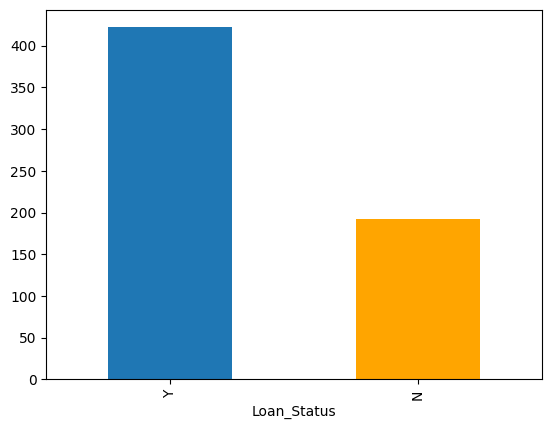

In [72]:
# Focus on Loan_Status
print(train['Loan_Status'].value_counts(normalize=True))
train['Loan_Status'].value_counts().plot.bar(color=['tab:blue', 'orange'])


In [58]:
# list categorical and numerical variables
categorical = [var for var in train.columns if train[var].dtype=='O']
categorical.remove('Loan_ID')
categorical.remove('Loan_Status')
numerical = [var for var in train.columns if train[var].dtype!='O']

# if numerical variables contains only 1 and 0, then it is categorical
numerical.remove('Credit_History')
categorical.append('Credit_History')
numerical.remove('Loan_Amount_Term')
categorical.append('Loan_Amount_Term')

print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n\n', categorical)
print('\n\nThere are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :\n\n', numerical)


There are 8 categorical variables

The categorical variables are :

 ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Amount_Term']


There are 3 numerical variables

The numerical variables are :

 ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


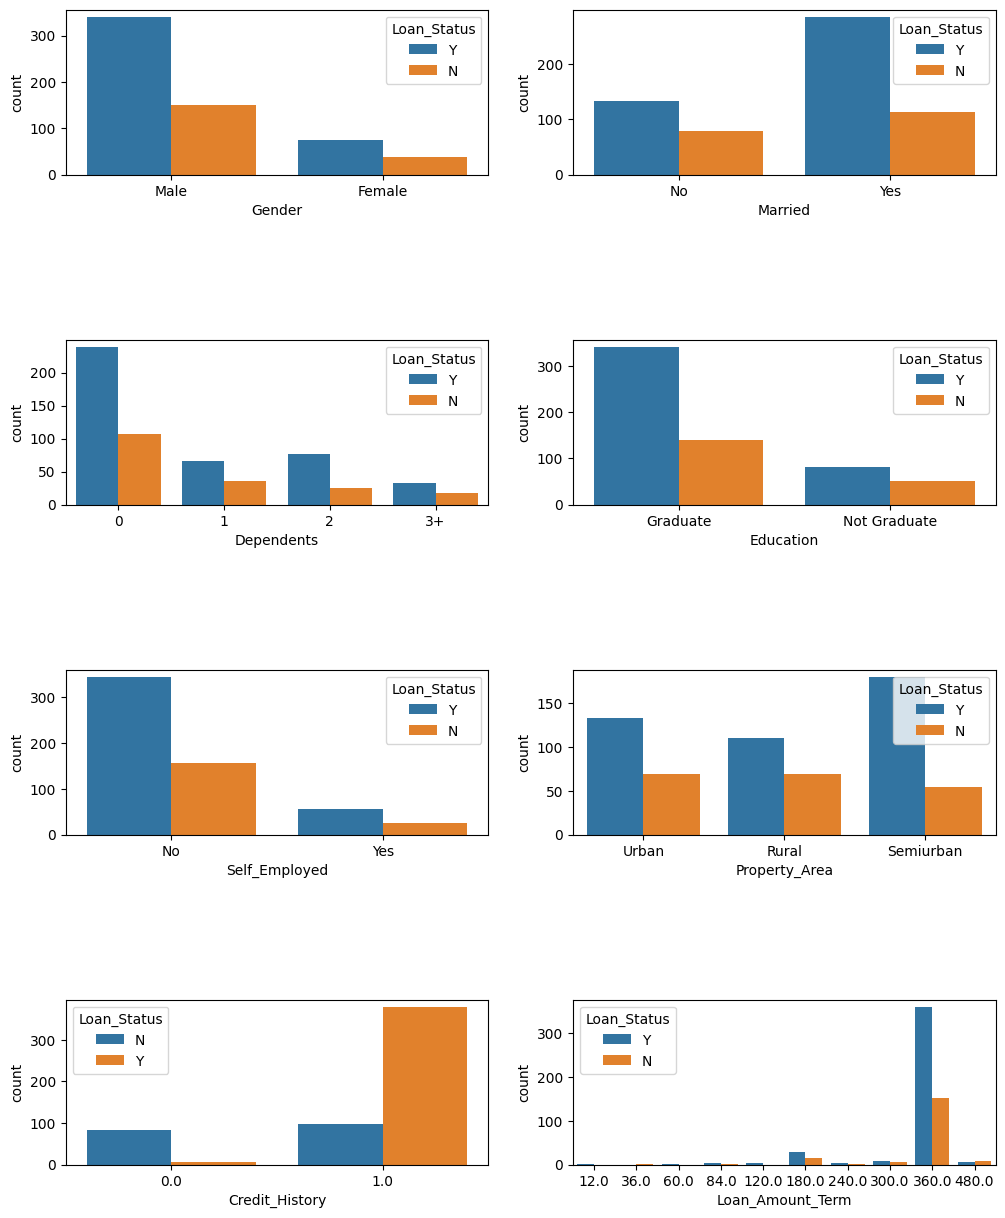

In [79]:
# plot countbox for categorical variables by Loan_Status
fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=train,hue='Loan_Status',ax=axes[row,col])

plt.subplots_adjust(hspace=1)

       ApplicantIncome  CoapplicantIncome  LoanAmount
count       614.000000         614.000000  592.000000
mean       5403.459283        1621.245798  146.412162
std        6109.041673        2926.248369   85.587325
min         150.000000           0.000000    9.000000
25%        2877.500000           0.000000  100.000000
50%        3812.500000        1188.500000  128.000000
75%        5795.000000        2297.250000  168.000000
max       81000.000000       41667.000000  700.000000


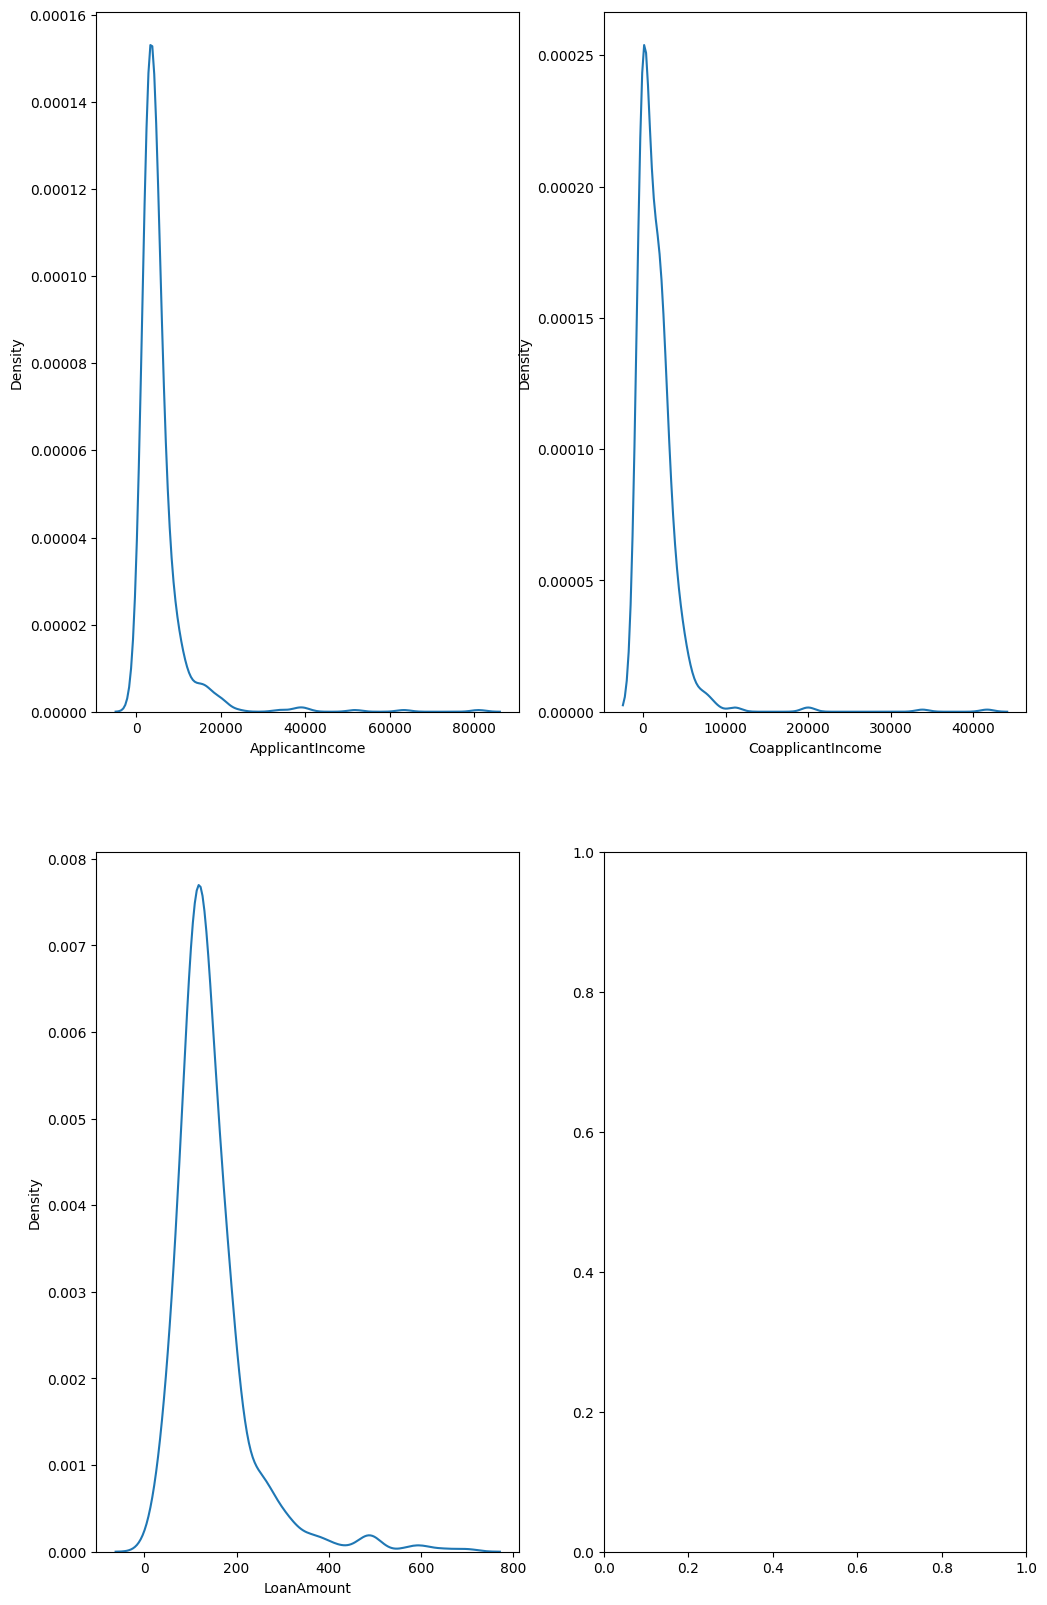

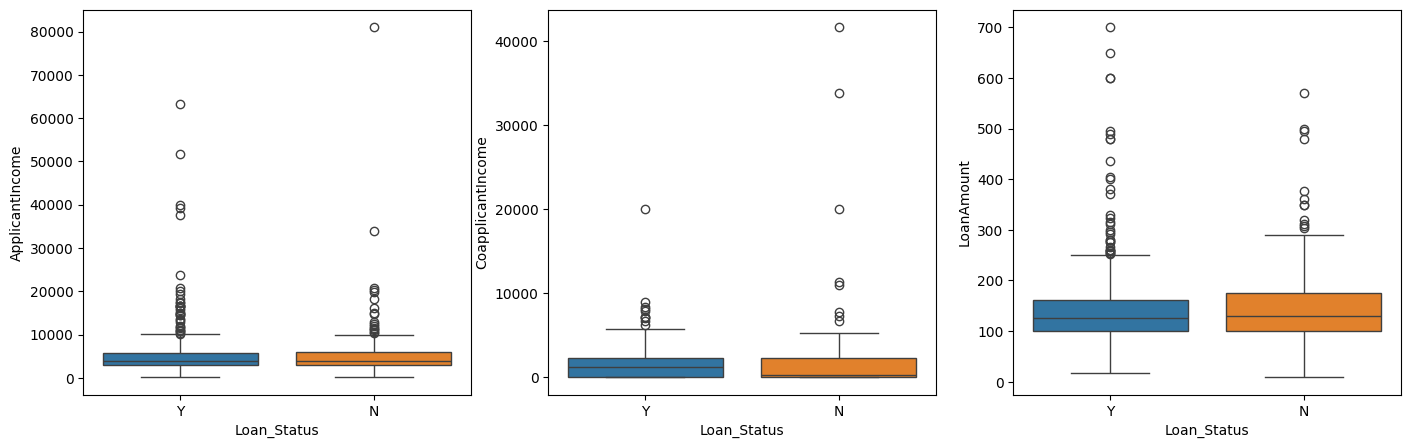

In [94]:
# describe numerical variables
print(train[numerical].describe())
# plot distribution of numerical variables
fig,axes = plt.subplots(2,2,figsize=(12,20))
for idx,cat_col in enumerate(numerical):
    row,col = idx//2,idx%2
    sns.kdeplot(data=train.loc[train[cat_col].notnull(),cat_col],ax=axes[row,col])
# boxplot for numerical variables by Loan_Status change color by Loan_Status
fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numerical):
    sns.boxplot(y=cat_col,data=train,x='Loan_Status',ax=axes[idx],hue='Loan_Status')
plt.subplots_adjust(hspace=1)


                   ApplicantIncome  CoapplicantIncome  LoanAmount
ApplicantIncome           1.000000          -0.116605    0.570909
CoapplicantIncome        -0.116605           1.000000    0.188619
LoanAmount                0.570909           0.188619    1.000000


<Axes: >

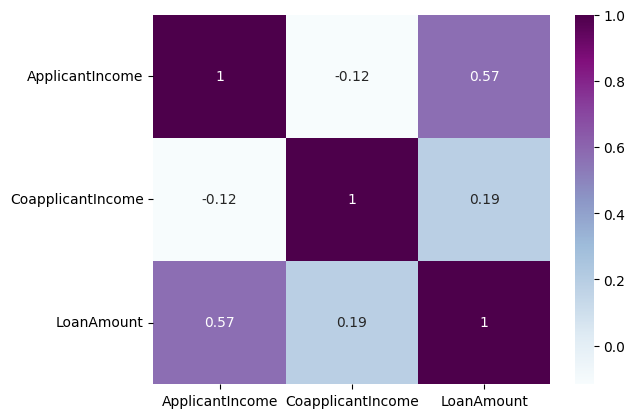

In [95]:
# Correlation between numerical variables
print(train[numerical].corr())
# plot correlation
sns.heatmap(train[numerical].corr(),annot=True,cmap='BuPu')

In [98]:
trainEncoded = train.copy()
trainEncoded.drop('Loan_ID',axis=1,inplace=True)
trainEncoded = pd.get_dummies(trainEncoded,drop_first=True)
trainEncoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,NaN,360.0,1.0,True,False,False,False,False,False,False,False,True,True
1,4583,1508.0,128.0,360.0,1.0,True,True,True,False,False,False,False,False,False,False
2,3000,0.0,66.0,360.0,1.0,True,True,False,False,False,False,True,False,True,True
3,2583,2358.0,120.0,360.0,1.0,True,True,False,False,False,True,False,False,True,True
4,6000,0.0,141.0,360.0,1.0,True,False,False,False,False,False,False,False,True,True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          614 non-null    int64  
 1   CoapplicantIncome        614 non-null    float64
 2   LoanAmount               592 non-null    float64
 3   Loan_Amount_Term         600 non-null    float64
 4   Credit_History           564 non-null    float64
 5   Gender_Male              614 non-null    bool   
 6   Married_Yes              614 non-null    bool   
 7   Dependents_1             614 non-null    bool   
 8   Dependents_2             614 non-null    bool   
 9   Dependents_3+            614 non-null    bool   
 10  Education_Not Graduate   614 non-null    bool   
 11  Self_Employed_Yes        614 non-null    bool   
 12  Property_Area_Semiurban  614 non-null    bool   
 13  Property_Area_Urban      614 non-null    bool   
 14  Loan_Status_Y            6

<Axes: >

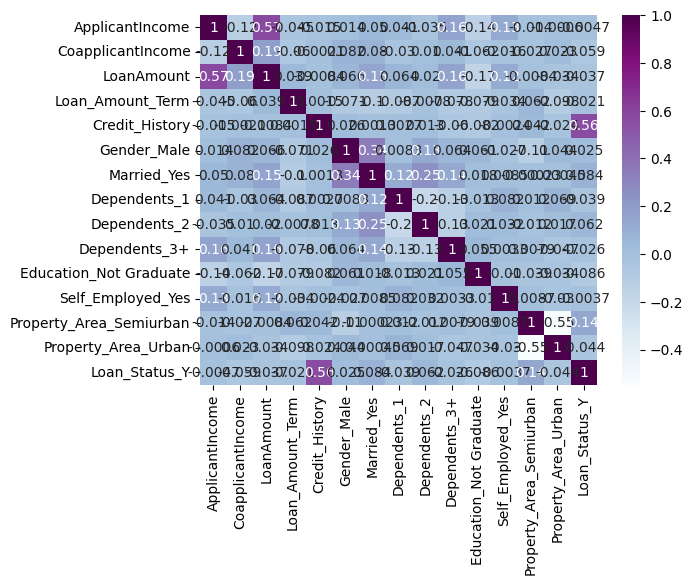

In [101]:
sns.heatmap(trainEncoded.corr(),annot=True,cmap='BuPu')

In [105]:
x = trainEncoded.drop(columns='Loan_Status_Y')
y = trainEncoded['Loan_Status_Y']

# split data into train and test
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify =y,random_state =42)
imp = SimpleImputer(strategy='mean')
imp_train = imp.fit(X_train)
X_train = imp_train.transform(X_train)
X_test_imp = imp_train.transform(X_test)

In [110]:

tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_train)
print("Training Data Set Accuracy: ", accuracy_score(y_train,y_pred))
print("Training Data F1 Score ", f1_score(y_train,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean())

Training Data Set Accuracy:  1.0
Training Data F1 Score  1.0
Validation Mean F1 Score:  0.66197605586146
Validation Mean Accuracy:  0.688373531230674


# Handle Overfitting 

<Axes: xlabel='Max_Depth', ylabel='Values'>

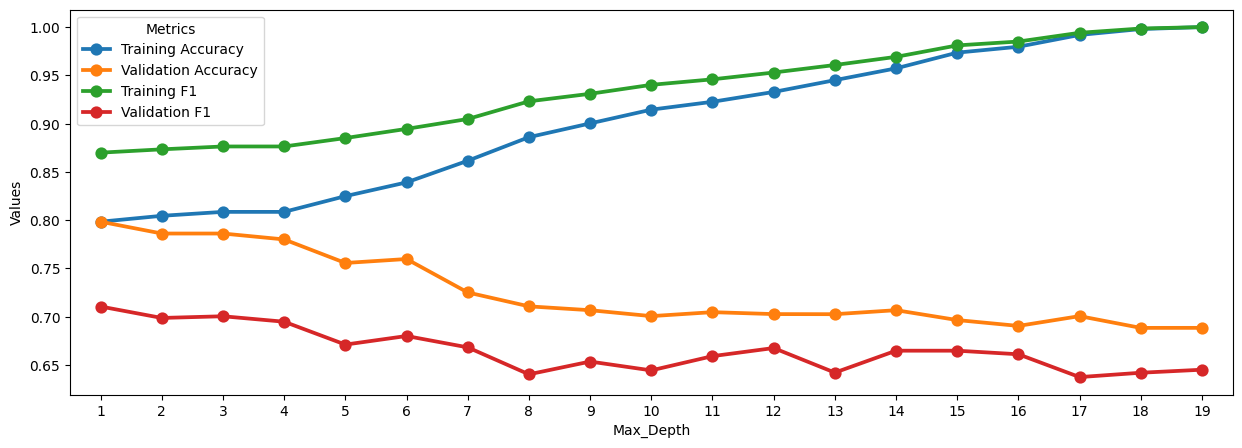

In [111]:
training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
tree_depths = []

for depth in range(1,20):
    tree_clf = DecisionTreeClassifier(max_depth=depth)
    tree_clf.fit(X_train,y_train)
    y_training_pred = tree_clf.predict(X_train)

    training_acc = accuracy_score(y_train,y_training_pred)
    train_f1 = f1_score(y_train,y_training_pred)
    val_mean_f1 = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean()
    
    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    tree_depths.append(depth)
    

Tuning_Max_depth = {"Training Accuracy": training_accuracy, "Validation Accuracy": val_accuracy, "Training F1": training_f1, "Validation F1":val_f1, "Max_Depth": tree_depths }
Tuning_Max_depth_df = pd.DataFrame.from_dict(Tuning_Max_depth)

plot_df = Tuning_Max_depth_df.melt('Max_Depth',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Max_Depth", y="Values",hue="Metrics", data=plot_df,ax=ax)

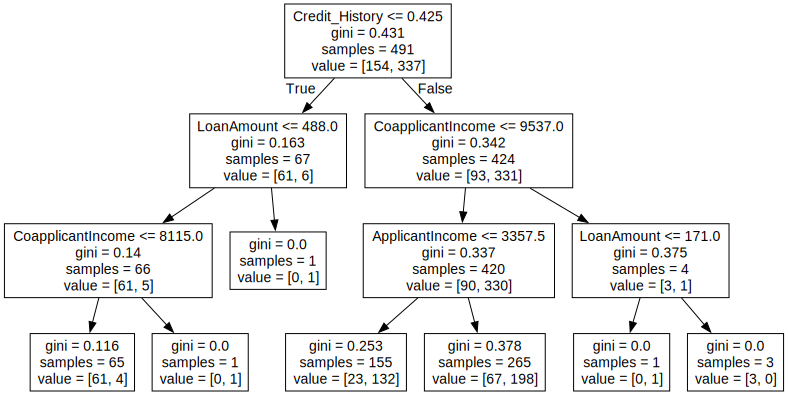

In [122]:
tree_clf = tree.DecisionTreeClassifier(max_depth = 3)
tree_clf.fit(X_train,y_train)
dot_data = tree.export_graphviz(tree_clf,feature_names = x.columns.tolist())
graph = graphviz.Source(dot_data)
graph